# <h1>Non-parametric cluster permutation test</h1>

<h2>Testing differences between full time-frequency windows between two conditions</h2>

<br>
    
**Required data format**: Fully transformed segments for respective conditions either in text form (i.e. .csv, .txt., .mat, etc) or as mne tfr object with segments x channels x frequencies x time samples. Please note that if the data is in text form an additional step is needed to bring the text files in the right format.


**Background literature**:
<a href="http://www.mudriklab.tau.ac.il/wp-content/uploads/2015/02/MarisOostenveld_2007.pdf">Maris, E., & Oostenveld, R. (2007). Nonparametric statistical testing of EEG-and MEG-data. Journal of neuroscience methods, 164(1), 177-190.</a>

First, import all the required libraries

In [223]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import mne

from mne.stats import permutation_cluster_test
from nilearn.plotting import plot_stat_map

### Next, load the time frequency results. 
### This analysis can either be performed on single trials or on single subjects. Either way, the first dimension before the channel dimension will be iterated over.

In [115]:
# Set the path, power type, and conditions you want to compare
# In this case, this will be evoked power after turning towards the right vs. the left while navigating in the t-maze
path = '/Volumes/INTENSO/EEG_fMRI_tmaze/tf_results/sub8/'
pType = 'evoked'
cond1 = 'right_maze'
cond2 = 'left_maze'

# Set the working directory
os.chdir(path)

In [155]:
# Read the time frequency objects for the respective conditions
file1 = cond1 + '_' + pType + '-tfr.h5'
file2 = cond2 + '_' + pType + '-tfr.h5'

right = mne.time_frequency.read_tfrs(file1)[0].crop(tmin=-0.1, tmax=1)
left = mne.time_frequency.read_tfrs(file2)[0].crop(tmin=-0.1, tmax=1)

Reading right_maze_evoked-tfr.h5 ...
Not setting metadata
Reading left_maze_evoked-tfr.h5 ...
Not setting metadata


### Let's have a look at some details of the data files

In [156]:
# The info file gives us an overview of a lot of header information (montage, channel names, etc)
# I kept most of it empty for this
right.info

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | E1, E2, E3, E4, E5, E6, E7, E8, E9, ...
    chs : list | 256 items (EEG: 256)
    comps : list | 0 items
    custom_ref_applied : int | 0
    dev_head_t : dict | 3 items
    dig : list | 259 items (3 Cardinal, 256 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 256
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name

### Looking good. Why specifically this subject? 
### Let's see some MRI data, so we have an indication if this person has an active right parahippocampal cortex. Also, we can check if it produced some theta.

In [157]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [342]:
# Sepcify the t-image name, the contrast title, the time-frequency window and some other plotting variables

timage=path[:-16]+'mri/roi/subj/108/phc/maze.nii'
title='right vs. left (maze blocks), parahippocampal ROIs'

times = right.times
freqs = 7, 12
twin = .15, .25
vlim = -.15, .15
flim = 1, 30
PO8 = [149, 150, 159, 160]

No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied


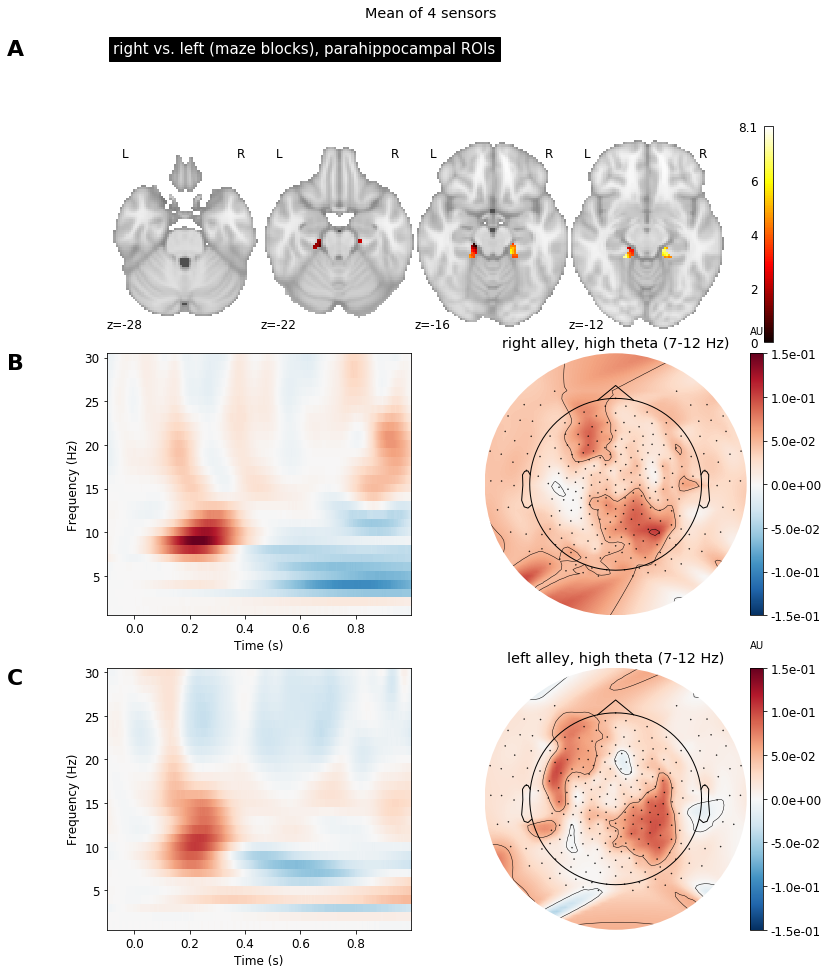

In [343]:
fig = plt.figure(figsize=(12, 15))

axes = [plt.subplot2grid((3, 2), (0, 0), colspan=2),
        plt.subplot2grid((3, 2), (1, 1), colspan=1),
        plt.subplot2grid((3, 2), (2, 1), colspan=1),
        plt.subplot2grid((3, 2), (1, 0), colspan=1),
        plt.subplot2grid((3, 2), (2, 0), colspan=1)]

plot_stat_map(timage, display_mode='z', cut_coords=[-28, -22, -16, -12],
              threshold=0, title=title, axes=axes[0]);

right.copy().average().plot_topomap(fmin=freqs[0], fmax=freqs[1], tmin=twin[0], tmax=twin[1], show=False,
                                    title='right alley, high theta (7-12 Hz)', vmin=vlim[0], vmax=vlim[1], 
                                    colorbar=True, sensors=True, cmap='RdBu_r', axes=axes[1]);

left.copy().average().plot_topomap(fmin=freqs[0], fmax=freqs[1], tmin=twin[0], tmax=twin[1], show=False,
                                   title='left alley, high theta (7-12 Hz)', vmin=vlim[0], vmax=vlim[1], 
                                   colorbar=True, sensors=True, cmap='RdBu_r', axes=axes[2]);

right.copy().average().plot(PO8, dB=False, baseline=None, colorbar=False, title=None,
                            tmin=times[0], tmax=times[-1], combine= 'mean', axes=axes[3],
                            fmin=flim[0], fmax=flim[1], vmin=vlim[0], vmax=vlim[1],
                            cmap='RdBu_r', show=False);

left.copy().average().plot(PO8, dB=False, baseline=None, colorbar=False, title=None,
                           tmin=times[0], tmax=times[-1], combine= 'mean', axes=axes[4],
                           fmin=flim[0], fmax=flim[1], vmin=vlim[0], vmax=vlim[1],
                           cmap='RdBu_r', show=False);

for ax, label in zip(axes, 'ABC'):
    ax.text(0.01, ax.get_position().ymax, label, transform=fig.transFigure,
            fontsize=22, fontweight='bold', va='top', ha='left')

### Sweet, this one has it all. So let's move on to the cluster permutation.

In [346]:
# Put the evoked power data averaged for the relevant channels of the two tfr objects into numpy arrays
right_power = np.mean(np.stack([right.data[:, PO8[0], 1:30, :], right.data[:, PO8[1], 1:30, :],
                     right.data[:, PO8[2], 1:30, :], right.data[:, PO8[3], 1:30, :]]), axis=0)  # only channel cluster PO8, so it becomes a 3D matrix
left_power = np.mean(np.stack([left.data[:, PO8[0], 1:30, :], left.data[:, PO8[1], 1:30, :],
                    left.data[:, PO8[2], 1:30, :], left.data[:, PO8[3], 1:30, :]]), axis=0)

# Create a difference image
diff_power = right_power - left_power
diff = right.copy()
diff.data = diff_power

In [345]:
# Compute test statistic by permutation clustering
threshold = 3.0
T_obs, clusters, cluster_p_values, H0 = \
    permutation_cluster_test([right_power, left_power],
                             n_permutations=1000, threshold=threshold, tail=0)

stat_fun(H1): min=0.000000 max=11.679111
Running initial clustering
Found 15 clusters
Permuting 999 times...
[........................................] 100.00%  |
Computing cluster p-values
Done.


### Lastly, to highlight significant clusters, we add a new stats image with only significant clusters (p<.05)


In [ ]:
T_obs_plot = np.nan * np.ones_like(T_obs)
for c, p_val in zip(clusters, cluster_p_values):
    if p_val <= 0.05:
        T_obs_plot[c] = T_obs[c]

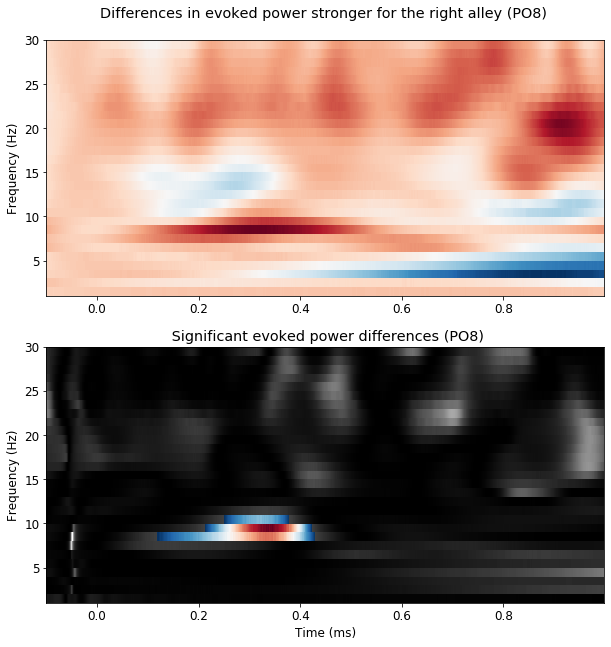

In [367]:
plt.figure(figsize=(10,16))

plt.subplot(3, 1, 1)
plt.imshow(np.mean(diff_power, axis=0),
           extent=[times[0], times[-1], flim[0], flim[-1]],
           aspect='auto', origin='lower', cmap='RdBu_r')

plt.ylabel('Frequency (Hz)')
plt.title('Differences in evoked power stronger for the right alley (PO8) \n')

plt.subplot(3, 1, 2)
plt.imshow(T_obs,
           extent=[times[0], times[-1], flim[0], flim[-1]],
           aspect='auto', origin='lower', cmap='gray')
plt.imshow(T_obs_plot,
           extent=[times[0], times[-1], flim[0], flim[-1]],
           aspect='auto', origin='lower', cmap='RdBu_r')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.title('\n Significant evoked power differences (PO8)')

plt.show()

### And we're done. Nice theta cluster. 
### That's all folks!